In [1]:
import numpy as np
import matplotlib.pyplot as plt
import nnfs
from nnfs.datasets import spiral_data

Inner workings of ReLU Activation Funtion

In [2]:
#Using conditionals
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs:
    if(i > 0):
        outputs.append(i)
    else:
        outputs.append(0)
print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [3]:
#much more convenient 
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

for i in inputs:
    outputs.append(max(0,i))
print(outputs)

[0, 2, 0, 3.3, 0, 1.1, 2.2, 0]


In [4]:
#Using numpy.maximum
inputs = [0, 2, -1, 3.3, -2.7, 1.1, 2.2, -100]
outputs = []

outputs = np.maximum(inputs,0)
print(outputs)

[0.  2.  0.  3.3 0.  1.1 2.2 0. ]


In [5]:
# ReLU Activation Class.
class Activation_ReLU:
    def forward(self,inputs):
        self.outputs = np.maximum(0,inputs) 

In [6]:
X,y = spiral_data(samples=100,classes=3)

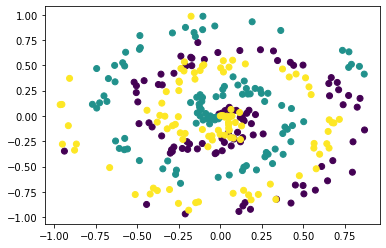

In [11]:
plt.scatter(X[:,0],X[:,1],c = y)

In [14]:
class Dense_Layer:
    def __init__(self,n_inputs,n_neurons):
        self.weigts = 0.01 * np.random.randn(n_inputs,n_neurons)  
        self.biases = np.zeros((1,n_neurons))
        
    def forward_pass(self,inputs):
        self.output = np.dot(inputs,self.weigts) + self.biases
        
class Activation_ReLU:
    def forward(self,inputs):
        self.output = np.maximum(0,inputs)

In [17]:
dense1 = Dense_Layer(2,4)

In [18]:
dense1.forward_pass(X)

In [19]:
activation1 = Activation_ReLU()

In [20]:
activation1.forward(dense1.output)

In [21]:
activation1.output[:3]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 1.11820668e-04, 5.67756689e-05],
       [0.00000000e+00, 0.00000000e+00, 1.30813471e-04, 8.90508381e-05]])

Softmax Activation Function

In [28]:
#Exponentiate the outputs of a layer
layer_outputs = [4.8, 1.21, 2.385]
exp_val = []

e = 2.71828182846
for i in layer_outputs:
    exp_val.append(e ** i)
    
print("Exponential values: ",exp_val)

Exponential values:  [121.51041751893969, 3.3534846525504487, 10.85906266492961]


In [30]:
#Normalizing the values
norm_base = sum(exp_val)
norm_val = []
for i in exp_val:
    norm_val.append(i / norm_base)
print("Normalized values: ",norm_val)
print("sum of the normalized values: ", sum(norm_val))

Normalized values:  [0.8952826639573506, 0.024708306782070668, 0.08000902926057876]
sum of the normalized values:  1.0


In [33]:
#Using Numpy
layer_outputs = [4.8, 1.21, 2.385]
exp_val = np.exp(layer_outputs)
print("Exponential values: ",exp_val)

norm_base = np.sum(exp_val)
norm_val = exp_val / norm_base
print("Normalized values: ",norm_val)
print("sum of the normalized values: ", np.sum(norm_val))

Exponential values:  [121.51041752   3.35348465  10.85906266]
Normalized values:  [0.89528266 0.02470831 0.08000903]
sum of the normalized values:  0.9999999999999999


<b>How axis does work!!</b>

In [39]:
layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

np.sum(layer_outputs,axis=None)

18.172

In [41]:
np.sum(layer_outputs,axis = 0,keepdims=True)  #row wise sum

array([[15.11 ,  0.451,  2.611]])

In [44]:
np.sum(layer_outputs,axis = 1,keepdims=True)  #column wise sum

array([[8.395],
       [7.29 ],
       [2.487]])

In [36]:
#To train in batchs we need to modify some of the code from the above block
layer_outputs = np.array([[4.8, 1.21, 2.385],
                          [8.9, -1.81, 0.2],
                          [1.41, 1.051, 0.026]])

exp_val = np.exp(layer_outputs)
print("Exponential values: ",exp_val)

norm_base = np.sum(exp_val,axis = 1,keepdims=True)
norm_val = exp_val / norm_base
print("Normalized values: ",norm_val)
print("sum of the normalized values: ", np.sum(norm_val,axis=1,keepdims=True))


Exponential values:  [[1.21510418e+02 3.35348465e+00 1.08590627e+01]
 [7.33197354e+03 1.63654137e-01 1.22140276e+00]
 [4.09595540e+00 2.86051020e+00 1.02634095e+00]]
Normalized values:  [[8.95282664e-01 2.47083068e-02 8.00090293e-02]
 [9.99811129e-01 2.23163963e-05 1.66554348e-04]
 [5.13097164e-01 3.58333899e-01 1.28568936e-01]]
sum of the normalized values:  [[1.]
 [1.]
 [1.]]


In [47]:
class Activation_Softmax:
    def forward(self,inputs):
        # making inputs ranging from -inf to 0
        exp_val = np.exp(inputs - np.max(inputs,axis=1,keepdims=1))
        probabilities = exp_val / np.sum(exp_val,axis = 1,keepdims=True)
        self.output = probabilities

In [53]:
softmax = Activation_Softmax()
softmax.forward([[1,2,3]])
print(softmax.output)
print(np.sum(softmax.output,axis=1,keepdims=True))

[[0.09003057 0.24472847 0.66524096]]
[[1.]]


In [61]:
softmax_c = Activation_Softmax()
softmax_c.forward(activation1.output)
print(softmax_c.output[:5])
print(np.sum(softmax_c.output,axis = 1,keepdims=True)[:5])

[[0.25       0.25       0.25       0.25      ]
 [0.24998946 0.24998946 0.25001742 0.25000366]
 [0.24998626 0.24998626 0.25001896 0.25000852]
 [0.2499535  0.2499535  0.25008742 0.25000558]
 [0.24993303 0.24993303 0.25013542 0.24999852]]
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]]
